### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_data = data.isnull().sum()
print("\nMissing data in each column:\n", missing_data)


Missing data in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
df_cleaned = data.dropna()
missing_data_cleaned = df_cleaned.isnull().sum()
print("\nMissing data after cleaning:\n", missing_data_cleaned)


Missing data after cleaning:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [6]:
total_observations = len(df_cleaned)
accepted_coupons = df_cleaned['Y'].sum()
proportion_accepted = (accepted_coupons / total_observations)*100
print(proportion_accepted)

57.407407407407405


5. Use a bar plot to visualize the `coupon` column.

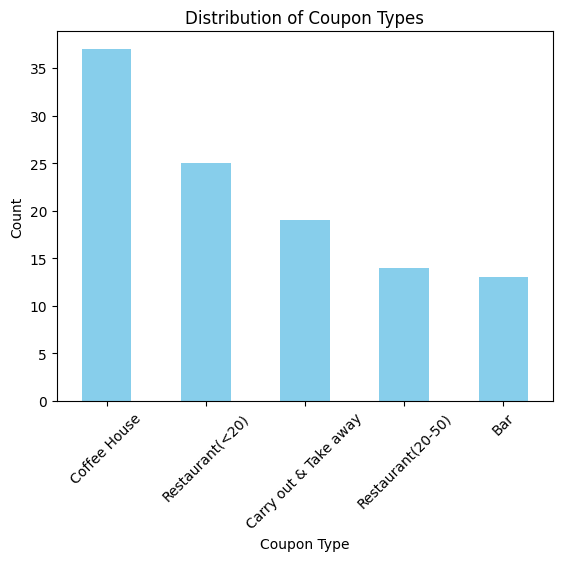

In [7]:
coupon_counts = df_cleaned['coupon'].value_counts()
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

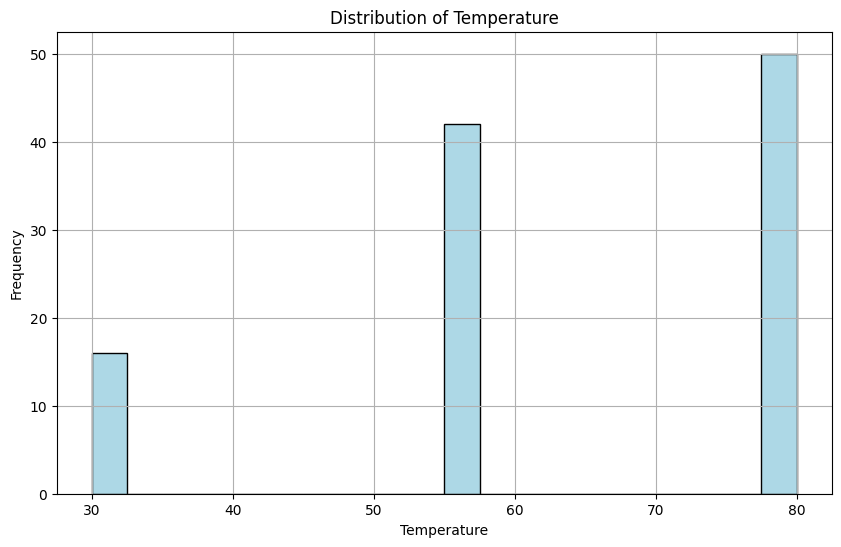

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df_cleaned['temperature'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupons = df_cleaned[df_cleaned['coupon'] == 'Bar']
bar_coupons.head()
bar_coupons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1239 to 8292
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           13 non-null     object
 1   passanger             13 non-null     object
 2   weather               13 non-null     object
 3   temperature           13 non-null     int64 
 4   time                  13 non-null     object
 5   coupon                13 non-null     object
 6   expiration            13 non-null     object
 7   gender                13 non-null     object
 8   age                   13 non-null     object
 9   maritalStatus         13 non-null     object
 10  has_children          13 non-null     int64 
 11  education             13 non-null     object
 12  occupation            13 non-null     object
 13  income                13 non-null     object
 14  car                   13 non-null     object
 15  Bar                   13 non-null     obje

2. What proportion of bar coupons were accepted?


In [10]:
proportion_accepted = bar_coupons['Y'].mean()
print(f"\nProportion of bar coupons that were accepted: {proportion_accepted:.2f}")


Proportion of bar coupons that were accepted: 0.23


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
data = pd.read_csv('data/coupons.csv')
bar_coupons = data[data['coupon'] == 'Bar']
pd.set_option('future.no_silent_downcasting', True)
bar_coupons.loc[:, 'Bar']  = bar_coupons['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9})

#Acceptance rate for those who went to a bar 3 or fewer times a month
acceptance_rate_fewer = bar_coupons[bar_coupons['Bar'] <= 3]['Y'].mean()

# Acceptance rate for those who went to a bar more than 3 times a month
acceptance_rate_more = bar_coupons[bar_coupons['Bar'] > 3]['Y'].mean()
print(f"The acceptance rate for those who went to a bar 3 or fewer times a month is {acceptance_rate_fewer:.2f}")
print(f"The acceptance rate for those who went to a bar more than 3 times a month is {acceptance_rate_more:.2f}")

The acceptance rate for those who went to a bar 3 or fewer times a month is 0.37
The acceptance rate for those who went to a bar more than 3 times a month is 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:


bar_coupons.loc[:, 'Bar'] = bar_coupons['Bar'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
bar_coupons.loc[:, 'age'] = bar_coupons['age'].replace({
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
})

bar_coupons.loc[:,'Bar'] = pd.to_numeric(bar_coupons['Bar'], errors='coerce')
bar_coupons.loc[:,'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Aceptance rate for drivers who go to a bar more than once a month and are over the age of 25
acceptance_rate_over_25_more_than_once = bar_coupons[
    (bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)
]['Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = bar_coupons[
    ~((bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25))
]['Y'].mean()


print(f"The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is {acceptance_rate_over_25_more_than_once:.2f}")
print(f"The acceptance rate for all other drivers is {acceptance_rate_others:.2f}")



The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 0.70
The acceptance rate for all other drivers is 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
# Drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
filtered_drivers = bar_coupons[(bar_coupons['Bar'] > 1) &
                               (bar_coupons['passanger'] != 'Kid(s)') &
                               (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))]

# Acceptance rate for the filtered drivers
acceptance_rate_filtered = filtered_drivers['Y'].mean()

# Acceptance rate for all other drivers
acceptance_rate_others = bar_coupons[~((bar_coupons['Bar'] > 1) &
                                       (bar_coupons['passanger'] != 'Kid(s)') &
                                       (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])))]['Y'].mean()

print(f"The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is {acceptance_rate_filtered:.2f}")
print(f"The acceptance rate for all other drivers is {acceptance_rate_others:.2f}")

The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is 0.71
The acceptance rate for all other drivers is 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:


# Condition 1:Drivers who go to bars more than once a month, not with kids, and not widowed
condition_1 = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')

# Condition 2: Drivers who go to bars more than once a month and are under 30
condition_2 = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)

# cheap restaurants
cheap_restaurants = data[data['coupon'] == 'Restaurant(<20)'].copy()  # Make a copy to avoid SettingWithCopyWarning
cheap_restaurants.loc[:, 'RestaurantLessThan20'] = cheap_restaurants['RestaurantLessThan20'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})


cheap_restaurants['RestaurantLessThan20'] = pd.to_numeric(cheap_restaurants['RestaurantLessThan20'], errors='coerce')


condition_3 = (cheap_restaurants['RestaurantLessThan20'] > 4) & (cheap_restaurants['income'].isin([
    'Less than $12500', 
    '$12500 - $24999', 
    '$25000 - $37499', 
    '$37500 - $49999'
]))


combined_conditions = condition_1 | condition_2 | condition_3.reindex(bar_coupons.index, fill_value=False)

# Acceptance rate for drivers meeting any of the conditions
acceptance_rate_combined = bar_coupons[combined_conditions]['Y'].mean()

# Acceptance rate for all other drivers
acceptance_rate_others = bar_coupons[~combined_conditions]['Y'].mean()


print(f"The acceptance rate for drivers meeting any of the conditions is {acceptance_rate_combined:.2f}")
print(f"The acceptance rate for all other drivers is {acceptance_rate_others:.2f}")

The acceptance rate for drivers meeting any of the conditions is 0.71
The acceptance rate for all other drivers is 0.29


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
#Frequent Bar Visitors: Drivers who visit bars more than once a month are more likely to accept bar coupons. This suggests that individuals who already have a habit of going to bars are more receptive to bar-related promotions.
#Age Factor: Younger drivers, particularly those under the age of 30, show a higher acceptance rate for bar coupons. This could indicate that younger individuals are more inclined to take advantage of social opportunities and promotions.
#Passenger Influence: Drivers who have passengers that are not kids are more likely to accept bar coupons. This might imply that having adult passengers, who might also be interested in visiting a bar, increases the likelihood of accepting such coupons.
#Marital Status: Drivers who are not widowed are more likely to accept bar coupons. This could be related to social behaviors and preferences associated with different marital statuses.
#Income and Restaurant Visits: Drivers who visit cheap restaurants more than four times a month and have an income of less than $50,000 are also more likely to accept bar coupons. This suggests that individuals who frequently dine out and have a lower income might be more attracted to discounts and promotions.
#Occupation: Drivers with occupations other than farming, fishing, or forestry are more likely to accept bar coupons. This could be due to lifestyle differences associated with various occupations.
#Summary
#Overall, the data suggests that drivers who are younger, frequent bar visitors, have adult passengers, are not widowed, and have certain income levels and occupations are more likely to accept bar coupons. These factors indicate a social and economic profile that is more receptive to bar-related promotions. Understanding these patterns can help in targeting marketing efforts more effectively.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:
# characteristics of passengers who accept Coffee House coupons:
coffee_coupons = data[data['coupon'] == 'Coffee House']
proportion_accepted = coffee_coupons['Y'].mean()
print(f"The proportion of coffee house coupons that were accepted is {proportion_accepted:.2f}")
coffee_coupons.loc[:, 'age'] = coffee_coupons['age'].replace({
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
})
coffee_coupons.loc[:, 'CoffeeHouse'] = coffee_coupons['CoffeeHouse'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
###################################################################
#Acceptance rate by age group
###################################################################
acceptance_rate_by_age = coffee_coupons.groupby('age')['Y'].mean()
print("\nAcceptance rate by age group:")
print(acceptance_rate_by_age)

###################################################################
# Acceptance rate by gender
###################################################################
acceptance_rate_by_gender = coffee_coupons.groupby('gender')['Y'].mean()
print("\nAcceptance rate by gender:")
print(acceptance_rate_by_gender)

#################################################################
# Acceptance rate by marital status
#################################################################
acceptance_rate_by_marital_status = coffee_coupons.groupby('maritalStatus')['Y'].mean()
print("\nAcceptance rate by marital status:")
print(acceptance_rate_by_marital_status)

# Acceptance rate by income level
acceptance_rate_by_income = coffee_coupons.groupby('income')['Y'].mean()
print("\nAcceptance rate by income level:")
print(acceptance_rate_by_income)


#################################################################
# Acceptance rate by education level
##################################################################
acceptance_rate_by_education = coffee_coupons.groupby('education')['Y'].mean()
print("\nAcceptance rate by education level:")
print(acceptance_rate_by_education)

###########################################################
# Acceptance rate by occupation
#####################################################################
acceptance_rate_by_occupation = coffee_coupons.groupby('occupation')['Y'].mean()
print("\nAcceptance rate by occupation:")
print(acceptance_rate_by_occupation)

# Acceptance rate by frequency of visiting coffee houses
acceptance_rate_by_coffeehouse_visits = coffee_coupons.groupby('CoffeeHouse')['Y'].mean()
print("\nAcceptance rate by frequency of visiting coffee houses:")
print(acceptance_rate_by_coffeehouse_visits)

The proportion of coffee house coupons that were accepted is 0.50

Acceptance rate by age group:
age
21         0.524349
26         0.514828
31         0.476726
36         0.467662
41         0.501538
46         0.513636
55         0.420183
below21    0.696774
Name: Y, dtype: float64

Acceptance rate by gender:
gender
Female    0.492443
Male      0.506427
Name: Y, dtype: float64

Acceptance rate by marital status:
maritalStatus
Divorced             0.523179
Married partner      0.493186
Single               0.516129
Unmarried partner    0.478382
Widowed              0.351351
Name: Y, dtype: float64

Acceptance rate by income level:
income
$100000 or More     0.494382
$12500 - $24999     0.540404
$25000 - $37499     0.473438
$37500 - $49999     0.542373
$50000 - $62499     0.503650
$62500 - $74999     0.436364
$75000 - $87499     0.296610
$87500 - $99999     0.557196
Less than $12500    0.551948
Name: Y, dtype: float64

Acceptance rate by education level:
education
Associates degree    

In [21]:
#Summary:
#Age: Younger passengers, especially those below 21, have a higher acceptance rate.
#Gender: Males have a slightly higher acceptance rate than females.
#Marital Status: Divorced and single passengers have higher acceptance rates compared to widowed passengers.
#Income: Passengers with lower income levels ($12500 - $24999) have a higher acceptance rate.
#Education: Acceptance rates are fairly consistent across different education levels.
#Occupation: Students and those in transportation and material moving occupations have higher acceptance rates.
#Frequency of Visits: Passengers who visit coffee houses more frequently are more likely to accept coffee house coupons.
